## A larger example


Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

 🔑 **Note:** When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples.

In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [4]:
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [5]:
X= insurance_one_hot.drop('charges', axis=1)

Y= insurance_one_hot['charges']


In [6]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


And create training and test sets. We could do this manually, but to make it easier, we'll leverage the already available [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function available from Scikit-Learn.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

In [8]:
tf.random.set_seed(42)

insurance_model= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

insurance_model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.mae, metrics=['mae'])

insurance_model.fit(x=X_train, y=y_train,
          batch_size=None, epochs=100,
          verbose=1, validation_data=None,
          steps_per_epoch=None, validation_steps=None,
          validation_batch_size=None, validation_freq=1)




Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10075.4111 - mae: 10075.4111   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7570.5244 - mae: 7570.5244 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7601.1382 - mae: 7601.1382 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7704.4712 - mae: 7704.4712 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7656.0952 - mae: 7656.0952 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7375.4839 - mae: 7375.4839 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7795.4585 - mae: 7795.4585 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7641.6621 - mae: 7641.6621 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7663.8594 - mae: 7663.8594 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7670.2109 - mae: 7670.2109 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7630.1030 - mae: 7630.1030 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [9]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8044.5410 - mae: 8044.5410  


[8044.541015625, 8044.541015625]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Changing the optimizer (from SGD to Adam).


Everything else will stay the same.

In [10]:
tf.random.set_seed(42)

insurance_model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])


history= insurance_model_2.fit(x=X_train, y=y_train,
          batch_size=None, epochs=100,
          verbose=1, validation_data=None,
          steps_per_epoch=None, validation_steps=None,
          validation_batch_size=None, validation_freq=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13383.1787 - mae: 13383.1787   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13378.2842 - mae: 13378.2842
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13373.6230 - mae: 13373.6230 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13369.1846 - mae: 13369.1846 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13364.9512 - mae: 13364.9512 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13360.9023 - mae: 13360.9023 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13357.0107 - mae: 13357.0107 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13353.2471 - mae: 13353.2471 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13349.5752 - mae: 13349.5752 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13345.9551 - mae: 13345.9551 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13342.3320 - mae: 13342.3320 
Epoch 12/100
34/34

In [11]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11229.1611 - mae: 11229.1611  


[11229.1611328125, 11229.1611328125]

Text(0.5, 0, 'epochs')

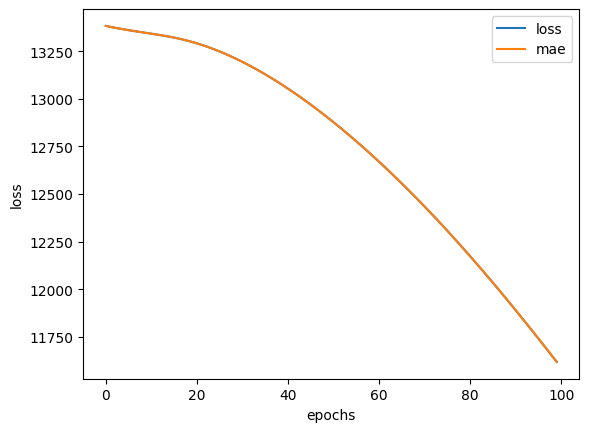

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

From this, it looks like our model's loss (and MAE) were both still decreasing (in our case, MAE and loss are the same, hence the lines in the plot overlap eachother).

What this tells us is the loss might go down if we try training it for longer.

> 🤔 **Question:** How long should you train for? 

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

Let's train the same model as above for a little longer. We can do this but calling fit on it again.

To view how our predicted values close to the real values, we draw the graph

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


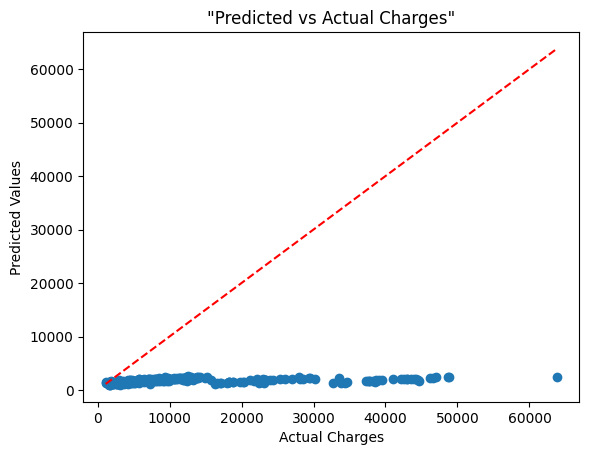

In [13]:
import matplotlib.pyplot as plt

predictions= insurance_model_2.predict(X_test).flatten()

plt.scatter(y_test,predictions)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Values')
plt.title('"Predicted vs Actual Charges"')
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()],'r--')
plt.show()




In [17]:
history_2= insurance_model_2.fit(X_train,y_train, epochs=300, verbose=0)

How did the extra training go?

In [19]:
insurance_model_2_loss,insurance_model_2_mae= insurance_model_2.evaluate(X_test,y_test)

insurance_model_2_loss, insurance_model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7368.4556 - mae: 7368.4556 


(7368.45556640625, 7368.45556640625)

<Axes: >

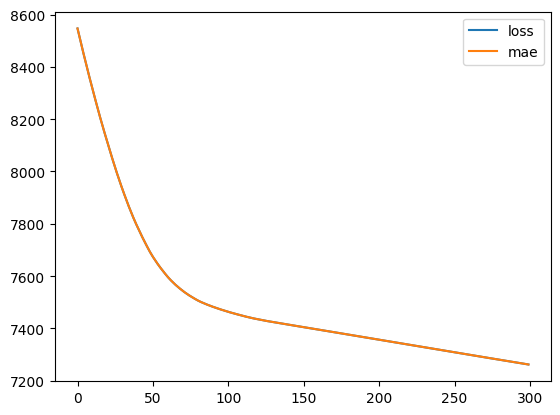

In [21]:
pd.DataFrame(history_2.history).plot()

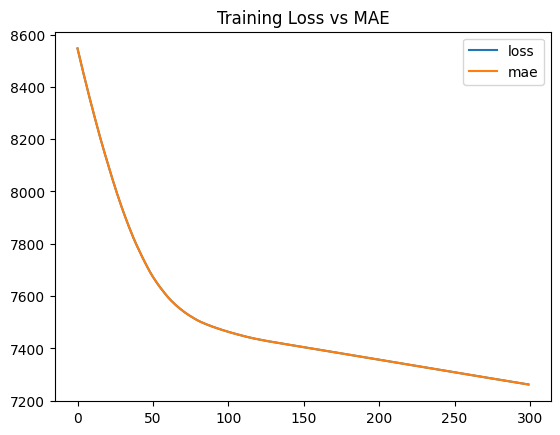

In [27]:
history_df = pd.DataFrame(history_2.history)

history_df[['loss', 'mae']].plot()
plt.title("Training Loss vs MAE")
plt.show()


In [28]:
history_3= insurance_model_2.fit(X_train,y_train, epochs=500, verbose=0)

In [29]:
insurance_model_3_loss,insurance_model_3_mae= insurance_model_2.evaluate(X_test,y_test)

insurance_model_3_loss, insurance_model_3_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6698.5078 - mae: 6698.5078 


(6698.5078125, 6698.5078125)

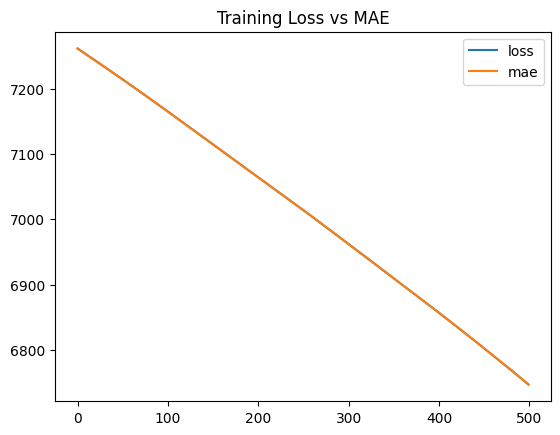

In [30]:
history_df = pd.DataFrame(history_3.history)

history_df[['loss', 'mae']].plot()
plt.title("Training Loss vs MAE")
plt.show()


In [31]:
history_4 = insurance_model_2.fit(
    X_train, y_train,
    epochs=600,
   validation_data=(X_test, y_test),
    verbose=0
)

In [32]:
insurance_model_4_loss,insurance_model_4_mae= insurance_model_2.evaluate(X_test,y_test)

insurance_model_4_loss, insurance_model_4_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6226.7852 - mae: 6226.7852 


(6226.78515625, 6226.78515625)

In [33]:
print(history_4.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop= EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True)

history_5 = insurance_model_2.fit(
    X_train, y_train,
    epochs=1000,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[early_stop]
)

In [36]:
insurance_model_5_loss,insurance_model_5_mae= insurance_model_2.evaluate(X_test,y_test)

insurance_model_5_loss, insurance_model_5_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5686.5566 - mae: 5686.5566 


(5686.556640625, 5686.556640625)

In [37]:
print(history_5.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [43]:
def plot_history(history,metrics=['loss','mae']):
    
    """
    Ploting the (and validation if available) curves from keras history object

    Parameters
    history : keras.callbacks.History
    The History object returned by model.fit().
    metrics : list of str
    Which metrics to plot (default ['loss', 'mae']).
    """
    history_df=pd.DataFrame(history.history)
    for metric in metrics:
        plt.Figure(figsize=(10,7))
        plt.plot(history_df[metric], label=f"Train {metric}")
        if f"val_{metric}" in history_df:
            plt.plot(history_df[f"val_{metric}"], label=f"val_{metric}")
        plt.title(f"Training vs validation metrics of {metric}")
        plt.xlabel("Epochs")
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)
        plt.show() 



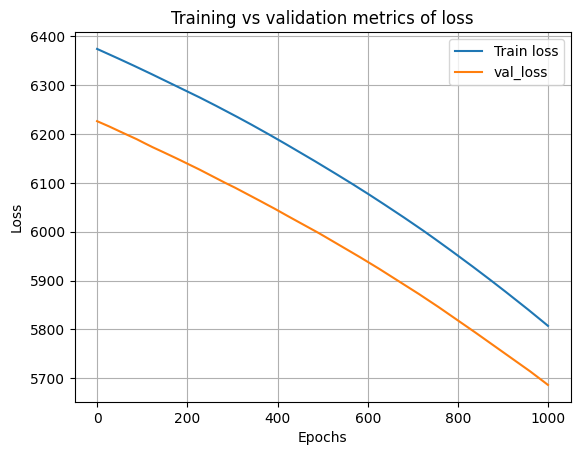

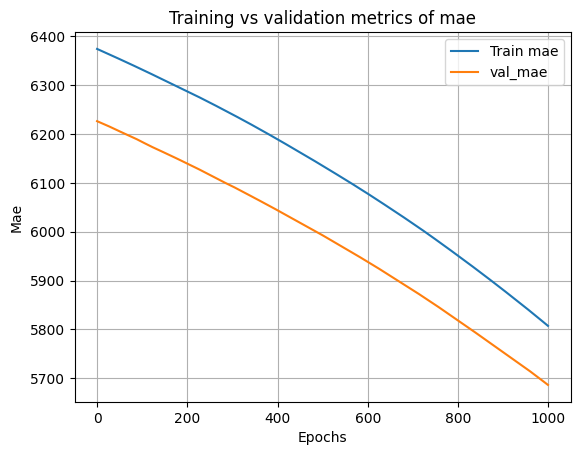

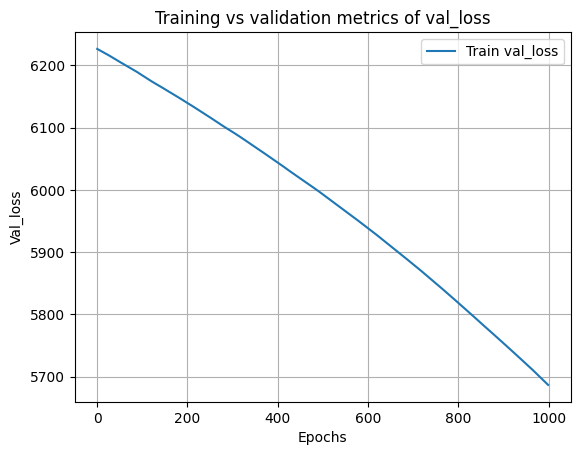

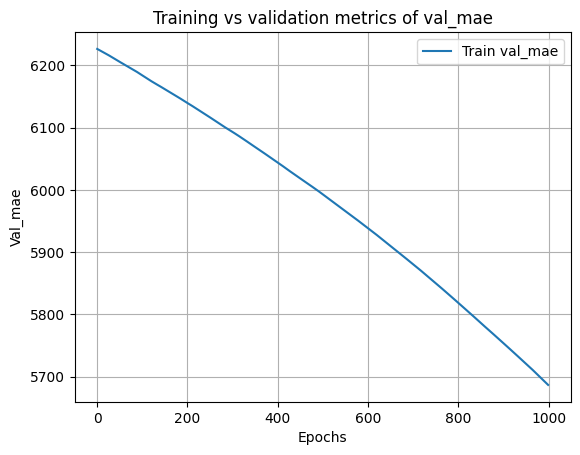

In [44]:
plot_history(history_5,metrics=['loss', 'mae', 'val_loss', 'val_mae'])

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop= EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True)

history_6 = insurance_model_2.fit(
    X_train, y_train,
    epochs=1500,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[early_stop]
)

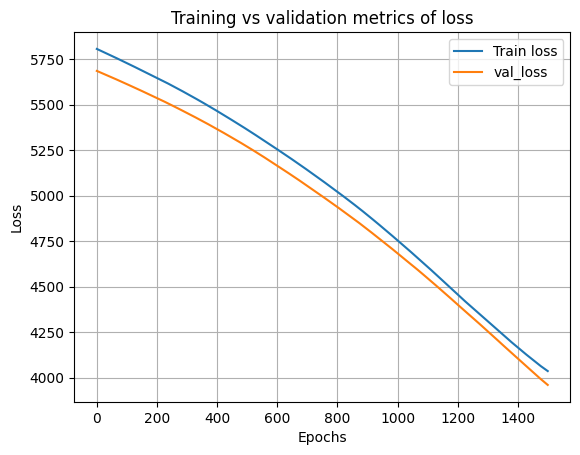

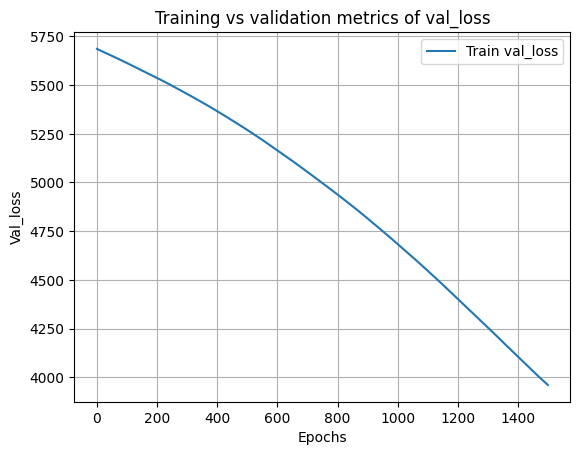

In [48]:
plot_history(history_6,metrics=['loss', 'val_loss'])

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop= EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True)

history_7 = insurance_model_2.fit(
    X_train, y_train,
    epochs=1700,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[early_stop]
)

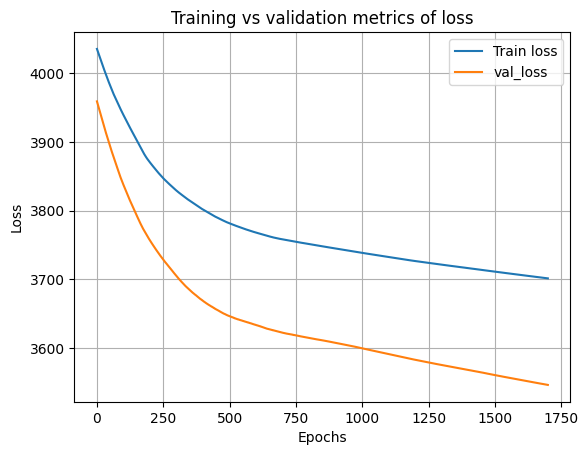

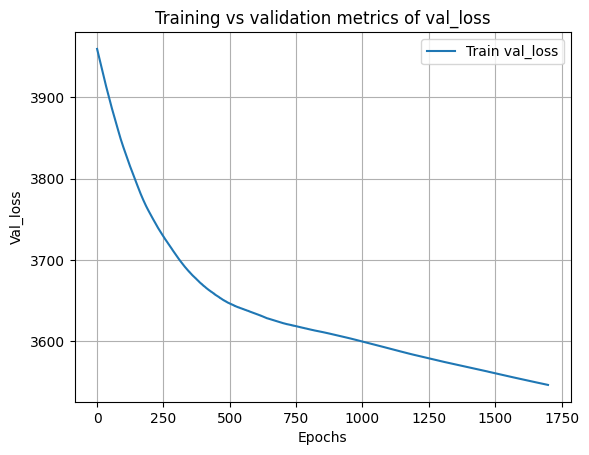

In [50]:
plot_history(history_7,metrics=['loss', 'val_loss'])

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

> 📖 **Resource:** For more on preprocessing data, I'd recommend reading the following resources:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

We've already turned our data into numbers using `get_dummies()`, let's see how we'd normalize it as well.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance_1 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [55]:
insurance_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing transformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [63]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder


ct= make_column_transformer((MinMaxScaler(),["age", "bmi", "children"]), (OneHotEncoder(),["sex", "smoker", "region"]))

X=insurance_1.drop('charges',axis=1)
y = insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)



x_train_transformer=ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)



In [60]:
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [64]:
x_train_transformer

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [66]:
X_test_transformed[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [67]:
print(x_train_transformer.shape)
print(X_test_transformed.shape)


(1070, 11)
(268, 11)


In [100]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop= EarlyStopping(monitor='val_loss', patience=20,restore_best_weights=True)

# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history_8 = insurance_model_3.fit(
    x_train_transformer, y_train,
    epochs=1000,
    validation_data=(X_test_transformed, y_test),
    verbose=0,
    callbacks=[early_stop]
)


In [101]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_transformed, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3156.6704 - mae: 3156.6704 


In [102]:
insurance_model_2_mae, insurance_model_3_mae

(7368.45556640625, 3156.67041015625)

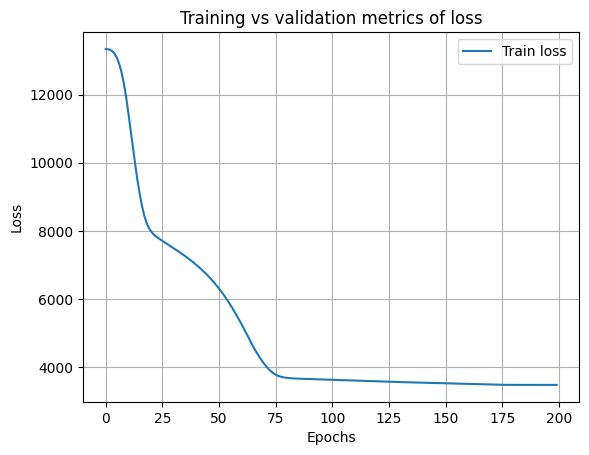

KeyError: 'val_loss'

In [77]:
plot_history(history_8,metrics=['loss', 'val_loss'])

In [103]:
print(history_8.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


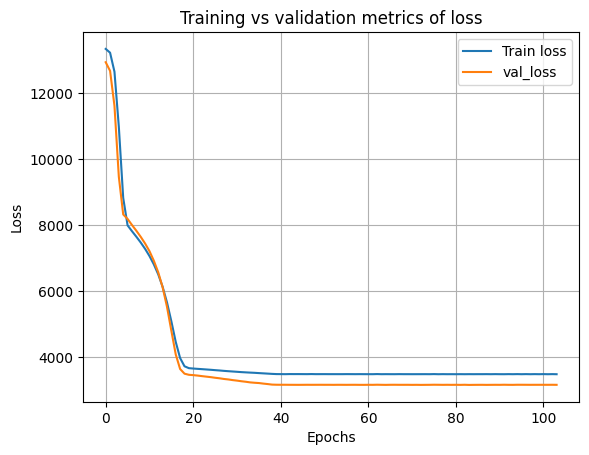

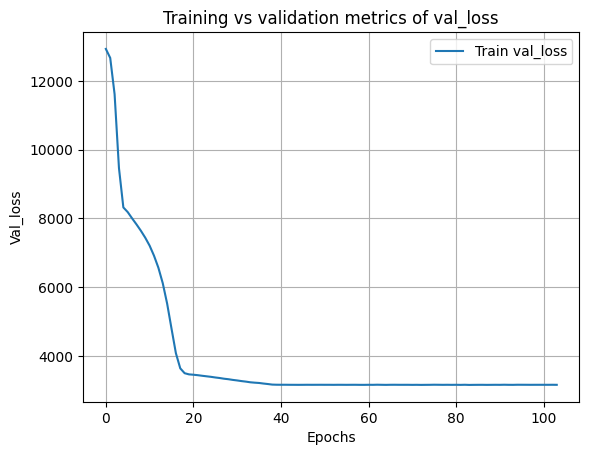

In [110]:
plot_history(history_8,metrics=['loss', 'val_loss'])